In [1]:
from scripts.utils import *

def preprocess(filename):
    file = "data/test/"+filename # filename
    df = pd.read_excel(file) # load xls file into pandas dataframe
    cols = df.columns # get column names
    new_cols = [] # initialize list to contain new column names

    if(cols[0]=="Rodent Sleep"):
        for i in range(len(cols)): # deep copy column names to new column names
            new_cols.append(cols[i])
        for i in range(1,len(new_cols)-2): # for each column name, try to extract frequency range
            new_cols[i]=new_cols[i].split(',')[0][7:]
        for i in range(1,6): # cleanup for first 5 frequency ranges still containing " HZ"
            new_cols[i]=new_cols[i][0:5]
        new_cols[-1]=new_cols[-1][:8] # remove end of column name
        new_cols[-2]=new_cols[-2][:5] # remove end of column name
        df.columns=new_cols # set dataframe column names to new column names
        df.rename(columns={"Rodent Sleep":"Class"},inplace=True)
        df.drop(df[df['Class'] == "X"].index, inplace = True)
        df["Class"]=pd.Categorical(df["Class"]).fillna(method='backfill').codes # Convert to categorical codes here so we can analyze percentage of each class in next code block
        df = df.drop([0]) # drop first row containing units [muV^2]
        df = df.fillna(0) ## handle NaN values
        for col in df.loc[:, df.columns != 'Class']: # typecast each column to type float
            df[col] = df[col].astype(float)
    elif(cols[0]=="10 second Epochs"):
        del df[df.columns[0]] # remove first column
        for i in range(1,len(cols)): # deep copy column names to new column names
            new_cols.append(cols[i])
        for i in range(2,len(new_cols)-2): # for each column name, try to extract frequency range
            new_cols[i]=new_cols[i].split(',')[0][7:]
        for i in range(2,7): # cleanup for first 5 frequency ranges still containing " HZ"
            new_cols[i]=new_cols[i][0:5]
        new_cols[-2]=new_cols[-2][:8] # remove end of column name
        new_cols[-1]=new_cols[-1][:5] # remove end of column name
        df.columns=new_cols # set dataframe column names to new column names
        df.rename(columns={"Rodent Sleep":"Class"},inplace=True)
        df.drop(df[df['Class'] == "X"].index, inplace = True)
        df["Class"]=pd.Categorical(df["Class"]).codes # Convert to categorical codes here so we can analyze percentage of each class in next code block
        df = df.drop([0]) # drop first row containing units [muV^2]
        df = df.fillna(0) ## handle NaN values
        for col in df.loc[:, df.columns != 'Class']: # typecast each column to type float
            df[col] = df[col].astype(float)
    else:
        for i in range(len(cols)): # deep copy column names to new column names
            new_cols.append(cols[i])    
        for i in range(0,len(new_cols)-2): # for each column name, try to extract frequency range
            new_cols[i]=new_cols[i].split(',')[0][7:]
        for i in range(0,5): # cleanup for first 5 frequency ranges still containing " HZ"
            new_cols[i]=new_cols[i][0:5]
        new_cols[-1]=new_cols[-1][:8] # remove end of column name
        new_cols[-2]=new_cols[-2][:5] # remove end of column name
        df.columns=new_cols # set dataframe column names to new column names
        df = df.drop([0]) # drop first row containing units [muV^2]
        df = df.fillna(0) ## handle NaN values
        for col in df.loc[:, df.columns != 'Class']: # typecast each column to type float
            df[col] = df[col].astype(float)
    os.system('mkdir data/preprocessed')
    filename = filename.replace(".xls","")
    df.to_csv("data/preprocessed/"+filename+"_preprocessed.csv",index=False) # save dataframe in csv format
    return df
def window(target_filename):
    df = pd.read_csv("data/preprocessed/"+target_filename)
    Y = pd.DataFrame()
    if(df.columns[0]!="Class"):
        return None
    for i in tqdm(range(len(df)-4)):
        win = df.iloc[i:i+5]
        c = np.argmax(np.bincount(win['Class']))
        del win['Class']
        x = win.values.flatten()
        x = np.insert(x,0,c)
        X = pd.DataFrame(x).T
        X = X.rename({0: 'Class'}, axis='columns')
        Y = pd.concat([Y,X])
    df_win = Y
    df_win = df_win.reset_index()
    del df_win['index']
    df_win['Class'] = df_win['Class'].astype(int)
    df = df_win
    if ( not os.path.isdir('data/windowed')):
        os.system('mkdir data/windowed')
    target_filename = target_filename.replace(".csv","")
    df.to_csv("data/windowed/"+target_filename+"_windowed.csv",index=False)
    return df
def balance(target_filename):
    df = pd.read_csv("data/windowed/"+target_filename)
    X = [p,s,w] = class_count(df)
    min_val = min(X)
    min_ind = X.index(min_val)
    max_val = max(X)
    max_ind = X.index(max_val)
    # ## Balancing
    # # TODO : balancing algorithm
    ps = df.loc[df["Class"]==0]
    ss = df.loc[df["Class"]==1]
    ws = df.loc[df["Class"]==2]
    locs = [ps,ss,ws]
    for i in range(int(max_val/min_val)):
        df = pd.concat([df,locs[min_ind]])
    p,s,w = class_count(df)
    if ( not os.path.isdir('data/windowed_balanced')):
        os.system('mkdir data/windowed_balanced')
    target_filename = target_filename.replace(".csv","")
    df.to_csv("data/windowed_balanced/"+target_filename+"_balanced.csv",index=False)
    return df

In [80]:
## Preprocess
for file in os.listdir("data/test"):
    preprocess(file)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6776223) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6682211) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6902050) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6902356) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6904822) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (6782131) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT s

In [81]:
## Windowing
for file in os.listdir("data/preprocessed"):
    window(file)

100%|██████████| 8636/8636 [00:22<00:00, 377.18it/s]


In [83]:
## Balancing
for file in tqdm(os.listdir("data/windowed")):
  balance(file)

  0%|          | 0/16 [00:00<?, ?it/s]Examples:
    Total: 8635
    P: 119 (1.38% of total)
    S: 1029 (11.92% of total)
    W: 7487 (86.71% of total)

Examples:
    Total: 16013
    P: 7497 (46.82% of total)
    S: 1029 (6.43% of total)
    W: 7487 (46.76% of total)

  6%|▋         | 1/16 [00:05<01:27,  5.84s/it]Examples:
    Total: 8636
    P: 699 (8.09% of total)
    S: 4707 (54.50% of total)
    W: 3230 (37.40% of total)

Examples:
    Total: 12830
    P: 4893 (38.14% of total)
    S: 4707 (36.69% of total)
    W: 3230 (25.18% of total)

 12%|█▎        | 2/16 [00:10<01:10,  5.06s/it]Examples:
    Total: 8637
    P: 518 (6.00% of total)
    S: 3453 (39.98% of total)
    W: 4666 (54.02% of total)

Examples:
    Total: 13299
    P: 5180 (38.95% of total)
    S: 3453 (25.96% of total)
    W: 4666 (35.09% of total)

 19%|█▉        | 3/16 [00:15<01:03,  4.89s/it]Examples:
    Total: 8636
    P: 486 (5.63% of total)
    S: 3330 (38.56% of total)
    W: 4820 (55.81% of total)

Examples:
 

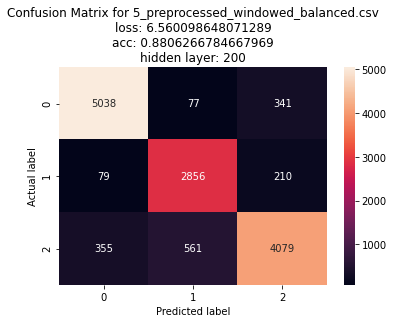

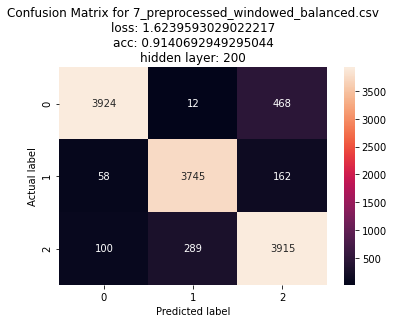

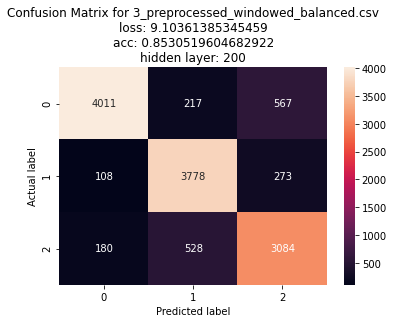

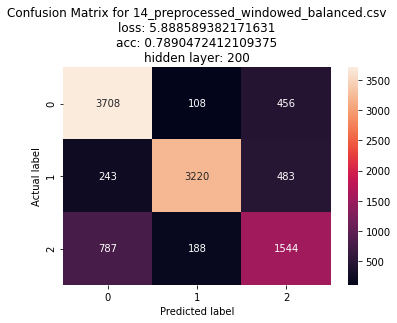

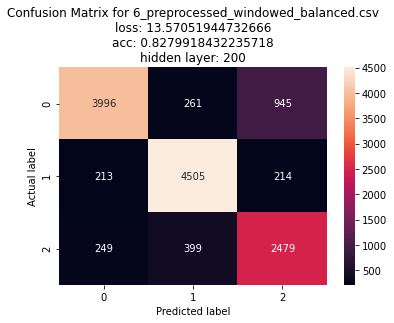

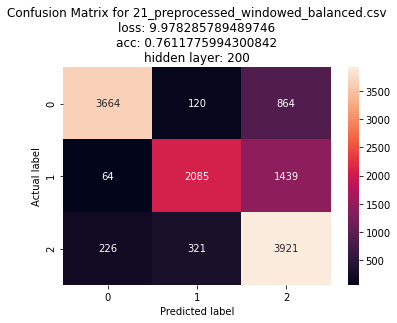

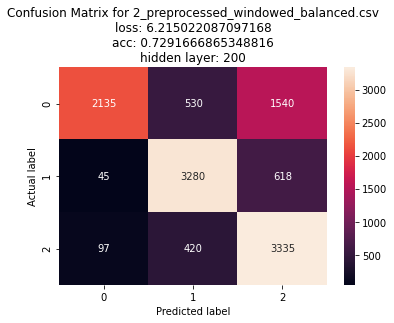

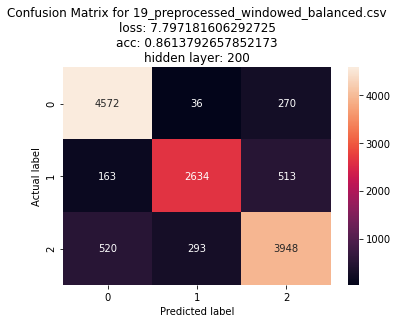

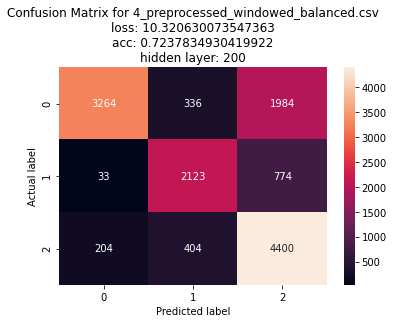

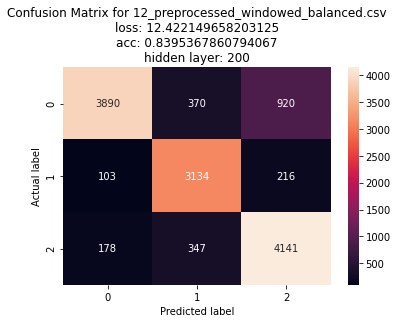

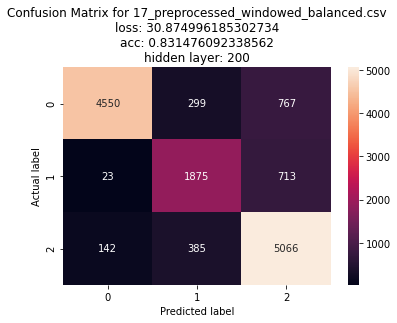

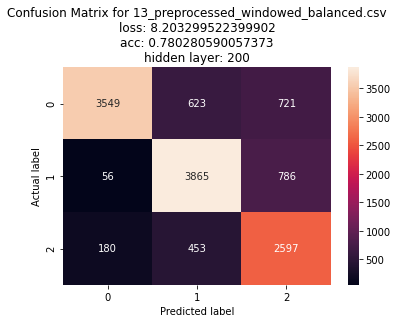

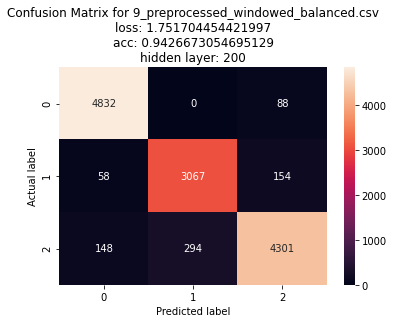

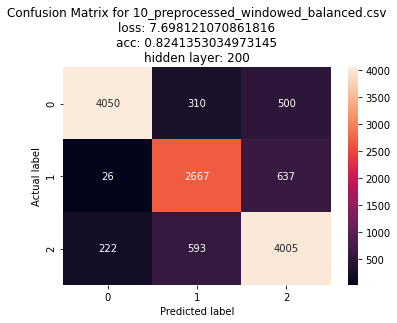

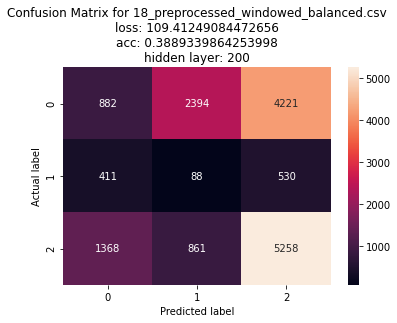

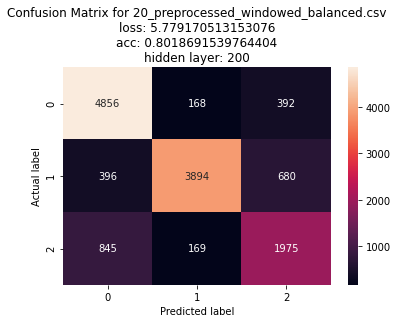

In [3]:
accs = []
for file in os.listdir("data/windowed_balanced"):
    df = pd.read_csv("data/windowed_balanced/"+file)
    test_labels = np.array(df.pop('Class'))
    test_features = np.array(df)
    model = keras.models.load_model('./model')
    BATCH_SIZE=200
    hln = 200
    test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
    test_predictions_baseline.argmax(axis=1)
    baseline_results = model.evaluate(test_features, tf.one_hot(test_labels,depth=3),
                                        batch_size=BATCH_SIZE, verbose=0)
    plot_cm(tf.one_hot(test_labels,depth=3).numpy().argmax(axis=1),test_predictions_baseline.argmax(axis=1),baseline_results,hln,file)
    accs.append(baseline_results[1])
    date = strftime('%X %x').replace("/","").split()
    plt.savefig("figures/"+str(date[1])+"@"+str(date[0][:5].replace(":",""))+"_"+str(hln)+"_"+file.replace(".csv","")+".jpg",bbox_inches='tight')

In [4]:
np.mean(accs)

0.7968245800584555

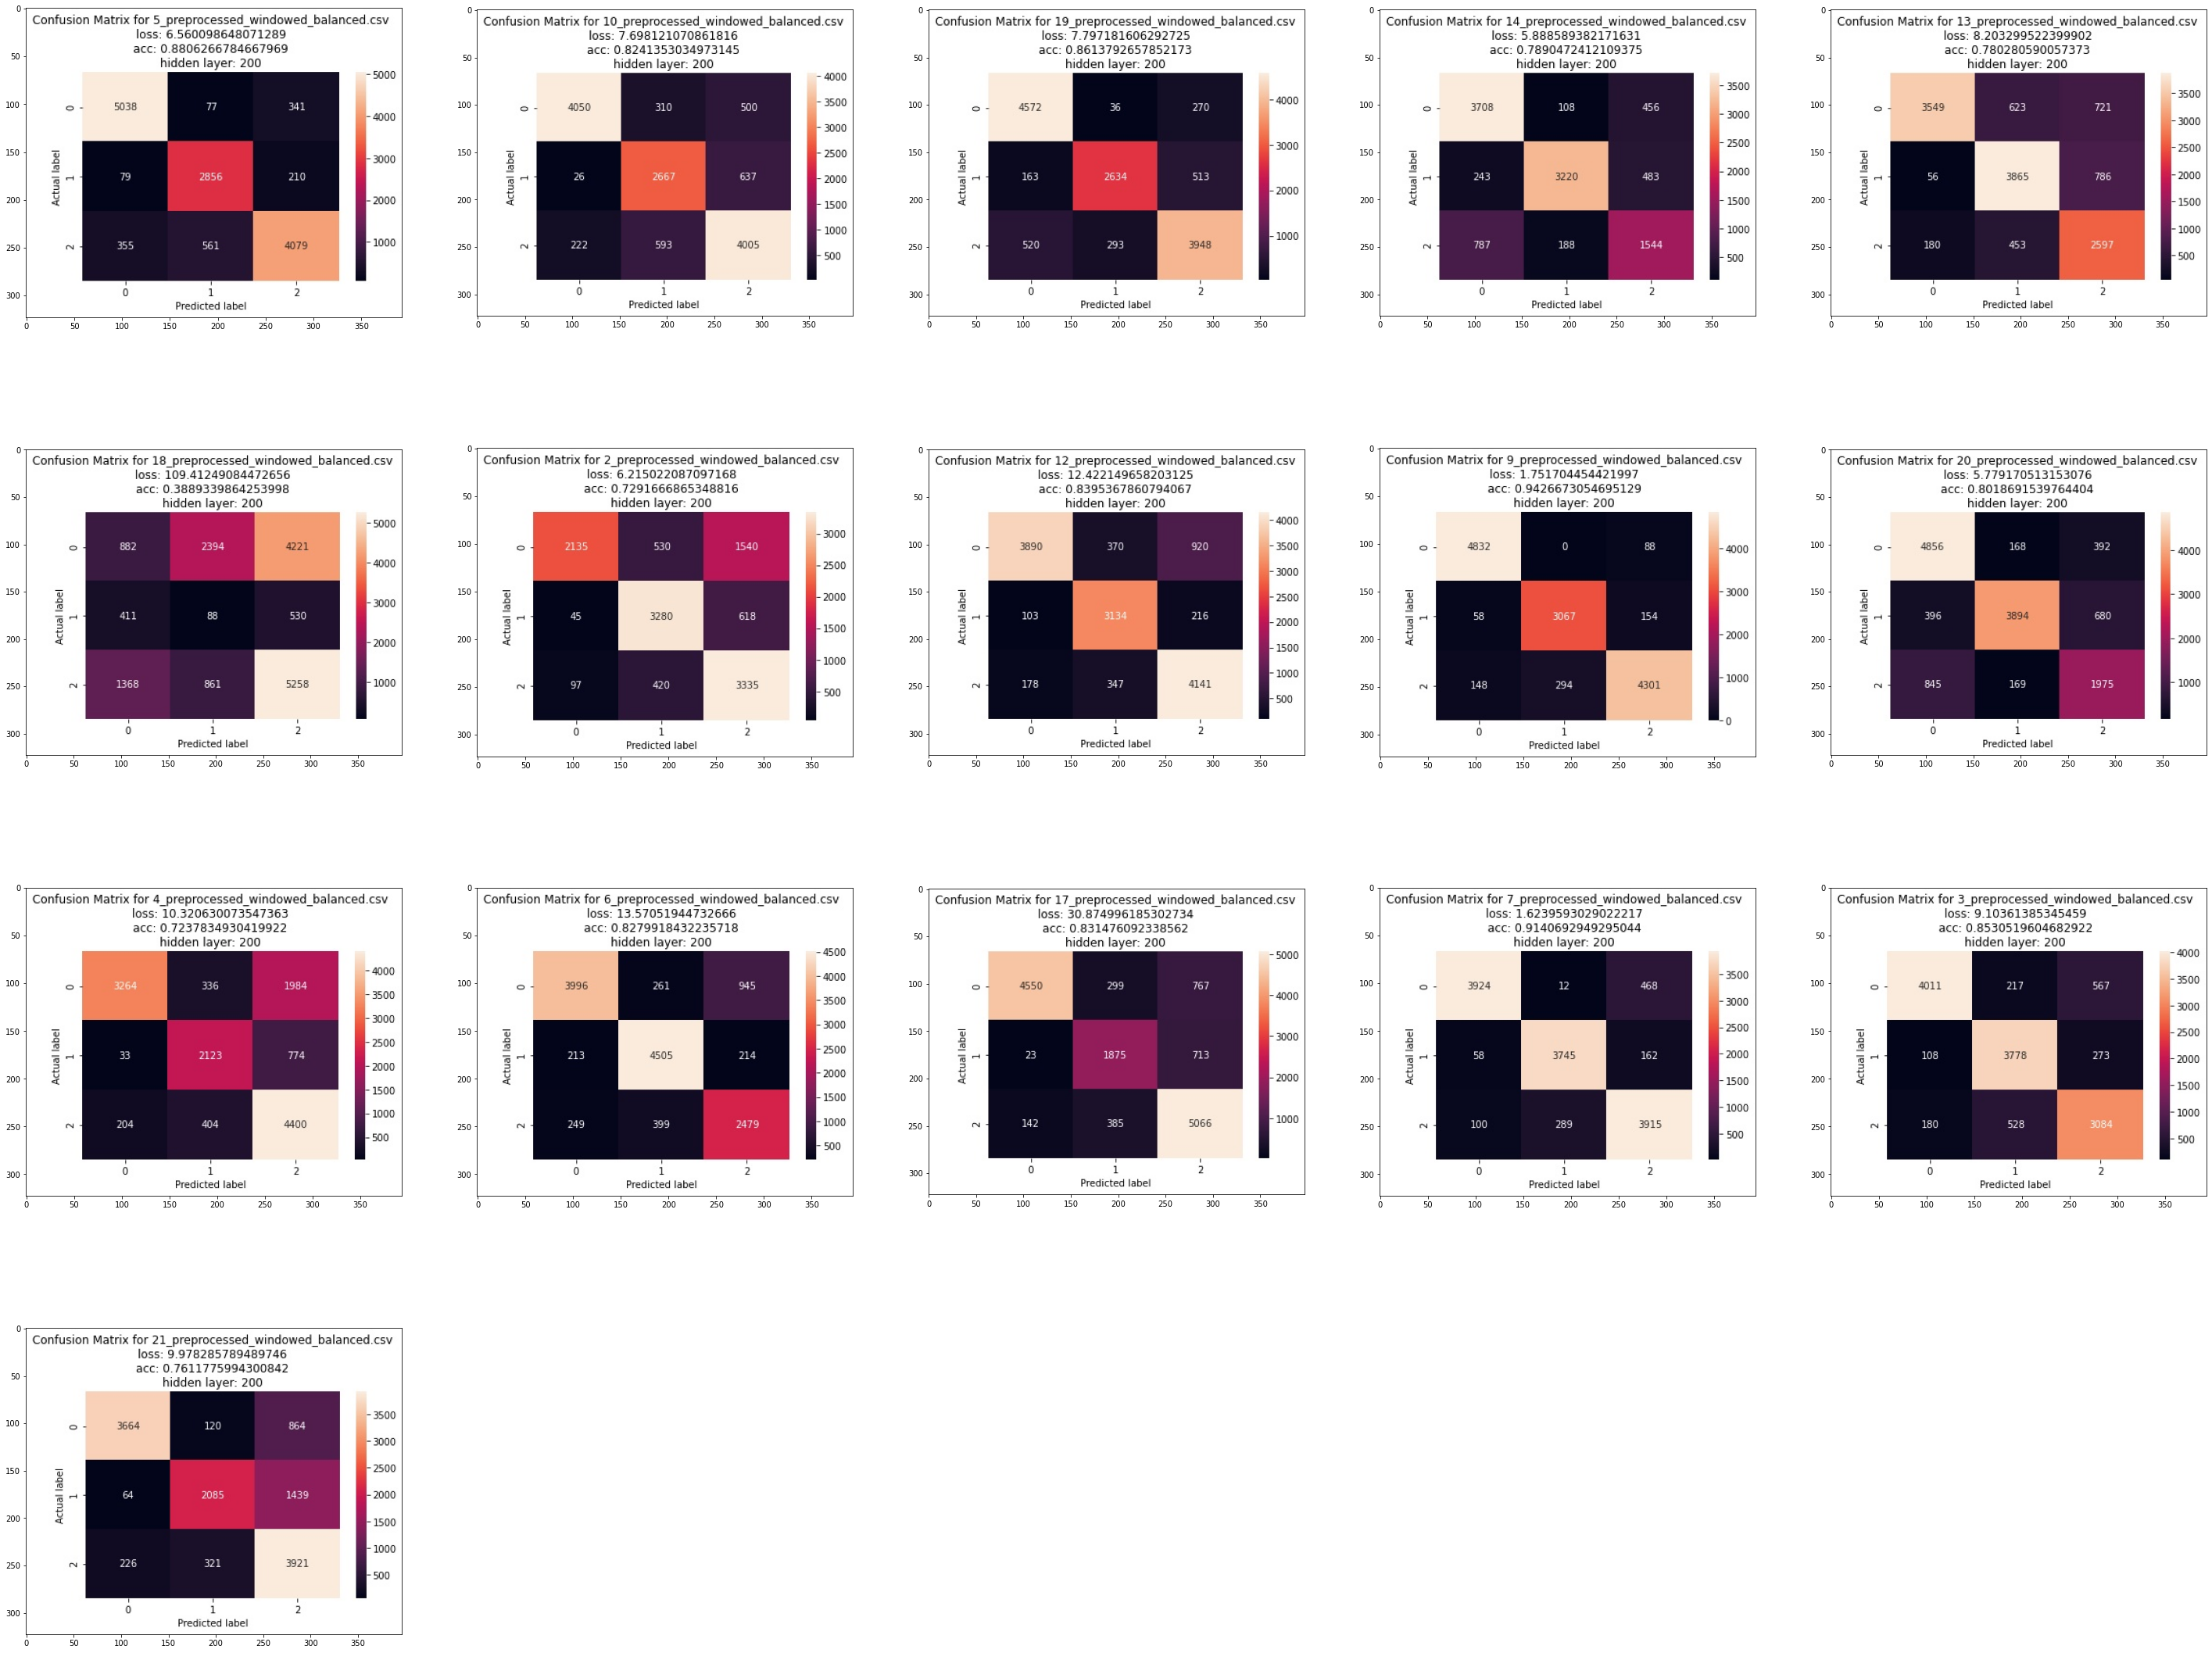

In [5]:
i=0
plt.figure(figsize=(50,50)) # specifying the overall grid size
import matplotlib.image as mpimg
for file in os.listdir('figures'):
    img = mpimg.imread("figures/"+file)
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    i=i+1
    plt.imshow(img)
plt.savefig('out.jpg',dpi=100,bbox_inches='tight')
plt.show()